In [27]:
# Kinetic Component Analysis in Julia
#### Own Julia code translated from the Python code found in Kinetic Component Analysis, Marcos López de Prado & Riccardo Rebonato - Journal of Investing (2016). and only changed slightly to allow for user input with regarding to the size of A (i.e. the number of degrees of the Taylor expansion).

In [1]:
#### Load packages
using IJulia
using StateSpaceModels
using Random
using Distributions
using Plots
using LinearAlgebra

In [84]:
fitKCA = function(t, z, q = 0.001, a = 2)

    # 1) Set up matrices A, H and Q
    h = (t[end] - t[1])/length(z)
    H = zeros(1, a + 1) ; H[1, 1] = 1
    A = zeros(a + 1, a + 1)
    for i in 1:a+1
        A[1:a-i+2, i:a+1] += Matrix(I/factorial(i-1)*h^(i-1), a - i + 2, a - i + 2)
    end
    Q = Matrix(I*q, a + 1, a + 1)
println(A)
    # 2-4) Apply filter, EM estimates and smooth
    kf = statespace(StateSpaceModel(z, H, A, Q); verbose = 0)
    x_mean  = kf.smoother.alpha
    x_covar = kf.smoother.V

    # 5) Std series
    x_std = zeros(length(z), a + 1)
    for i in 1:a+1
        x_std[:, i] = sqrt.(kf.smoother.V[i, i, :])
    end

    return (x_mean, x_std, x_covar)
end

#55 (generic function with 3 methods)

In [85]:
getPeriodic = function(periods, nobs, scale)
    t = range(0, stop = pi*periods*2.0, length = nobs)
    s = sin.(t)
    z = s .+ rand(Normal(0.0, scale), nobs)
    return (t, s, z)
end

#57 (generic function with 1 method)

In [86]:
plotKCA = function(nobs::Integer = 300, periods::Integer = 10, scale::Float64 = 0.5, q::Float64 = 0.001, a::Integer = 2)

    (a >= 0 && a <= 6) || throw(ArgumentError("Input 'a' must be an integer in [0; 6]"))

    t, s, z = getPeriodic(periods, nobs, scale)
    x_mean, x_std = fitKCA(t, z, q, a)

    plottext = ["Position" "Velocity" "Acceleration" "Jerk" "Snap" "Crackle" "Pop"]
    colors = ["blue" "green" "red" "pink" "yellow" "brown" "purple"]

    scatter(t, z, marker = :xcross, markersize = 2, label = "Measurements", color = "black")
    plot!(t, x_mean, label = plottext[:,1:a+1], color = colors[:,1:a+1], linewidth = 4)

    plot!(t, x_mean .- x_std * 2, label = "", color = colors[:,1:a+1], linewidth = 1)
    plot!(t, x_mean .+ x_std * 2, label = "", color = colors[:,1:a+1], linewidth = 1)

end

#59 (generic function with 6 methods)

[1.0 0.20943951023931953 0.021932454224643017; 0.0 1.0 0.20943951023931953; 0.0 0.0 1.0]


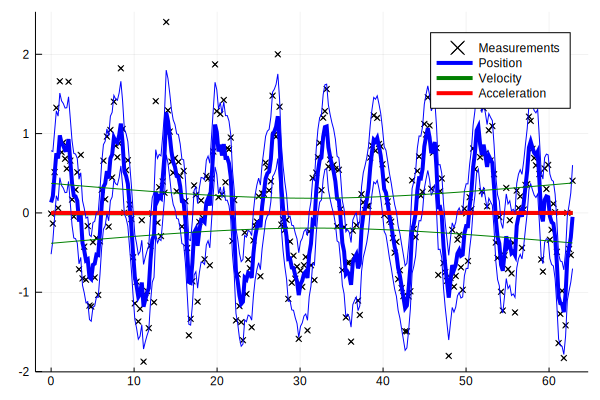

In [88]:
plotKCA(300, 10, 0.5, 0.001, 2)

In [79]:
#t, s, z = getPeriodic(10, 1_000, 0.5)


# 1 method for generic function "statespace":
[1] statespace(model::StateSpaceModel{T}; filter_type, opt_method, verbose) where T in StateSpaceModels at C:\Users\koefo\.julia\packages\StateSpaceModels\rhLkJ\src\StateSpaceModels.jl:29